# 概率统计模块

SciPy中负责概率统计的模块时scipy.stats：

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
from scipy import stats

## 基本统计量的计算

考虑这组身高数据：

In [4]:
h = np.array([1.46,1.79,2.01,1.75,1.56,1.69,1.88,1.76,1.88,1.78])

NumPy已经可以计算一些基础的统计数据，如最大最小值：

In [5]:
np.max(h), h.max()

(2.01, 2.01)

In [6]:
np.min(h), h.min()

(1.46, 1.46)

均值、方程、标准差：

In [7]:
np.mean(h), h.mean()

(1.7559999999999998, 1.7559999999999998)

In [8]:
np.std(h), h.std()

(0.15081114017207078, 0.15081114017207078)

In [9]:
np.var(h), h.var()

(0.022743999999999986, 0.022743999999999986)

中位数：

In [10]:
np.median(h)

1.77

scipy.stats模块提供了一些其他的统计量，如众数及其出现次数：

In [11]:
stats.mode(h)

ModeResult(mode=array([1.88]), count=array([2]))

偏度和峰度：

In [12]:
stats.skew(h), stats.kurtosis(h)

(-0.3935244564726347, -0.33067209772439865)

## 概率分布

概率分布可以分成连续分布和离散分布两大类。为了处理不同的分布，scipy.stats模块提供了一套公用的接口来处理它们。

### 连续分布的处理

最常见的连续分布是正态分布：

In [13]:
from scipy.stats import norm

产生一个服从标准正态分布的数组：

In [14]:
x_norm = norm.rvs(size=1000)

其直方图如下：

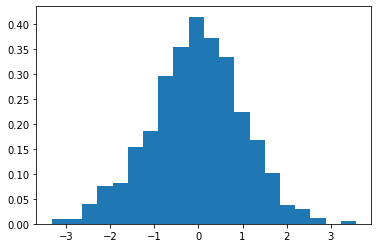

In [15]:
h = plt.hist(x_norm, bins=20, density=True)

数学上，正态分布有两个参数，分别为均值和标准差。可以使用.fit()方法估计上面这组数据对应的正态分布参数：

In [16]:
x_mean, x_std = norm.fit(x_norm)

In [17]:
x_mean, x_std

(-0.04144512171911825, 1.0443013935968204)

标准正态分布的均值为0，标准差为1，估计出的参数与真实参数已经十分接近。

可以用方法`norm.pdf()`来计算正态分布在某点处的对应的概率密度函数值：

In [18]:
x = np.linspace(-3, 3)

In [19]:
p = norm.pdf(x)

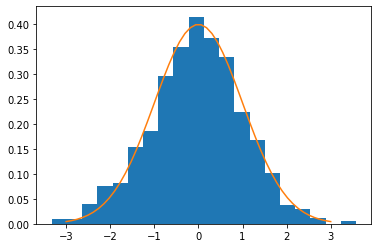

In [20]:
h = plt.hist(x_norm, bins=20, density=True)
plt.plot(x, p)

累计分布函数可以用方法`norm.cdf()`计算，对于正态分布来说，若均值为μ，标准差为σ，则有以下结论：
- 数据分布在(μ-σ,μ+σ)的概率约为0.683
- 数据分布在(μ-2σ,μ+2σ)的概率约为0.954
- 数据分布在(μ-3σ,μ+3σ)的概率约为0.997

利用标准正态分布的累计分布函数对这些结论进行验证：

In [21]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [22]:
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

In [23]:
norm.cdf(3) - norm.cdf(-3)

0.9973002039367398

累积分布函数的反函数可以使用`norm.ppf()`方法得到。比如找到标准正态分布中概率恰好为一半的点：

In [24]:
norm.ppf(0.5)

0.0

scipy.stats模块可以使用位置和尺度参数来改变概率分布的参数。设位置参数为loc，尺度参数为scale，对概率密度函数为`p(x)`的概率分布，进行尺度与平移变换后，新的概率密度函数为`p((x-loc)/scale)`。

在正态分布的例子中，方法.fit()返回的其实是对这两个参数的估计。在正态分布中，这两个参数恰好对应分布的均值和标准差。

可以通过改变这两个参数得到不同参数的概率分布：

In [25]:
x = np.linspace(-3, 3)

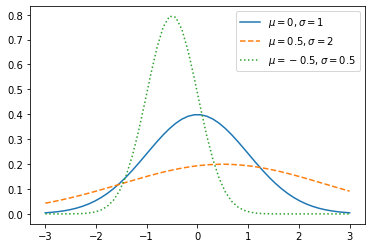

In [26]:
plt.plot(x, norm.pdf(x),
         x, norm.pdf(x, loc=0.5, scale=2), '--',
         x, norm.pdf(x, loc=-0.5, scale=0.5), ':')

plt.legend([r'$\mu=0,\sigma=1$', 
            r'$\mu=0.5,\sigma=2$',
            r'$\mu=-0.5,\sigma=0.5$'])

也可以将loc和scale参数直接传递给norm，来构造一个新的概率分布对象。下面这两种用法是等价的：
```python
norm(loc=0.5, scale=2).pdf(x)
norm.pdf(x, loc=0.5, scale=2)
```

除了正态分布外，还有一些其他的连续分布，如指数分布和学生t分布：

In [27]:
from scipy.stats import expon, t

指数分布的例子，其参数λ是尺度参数scale的倒数：

In [28]:
x = np.linspace(0.01, 1)

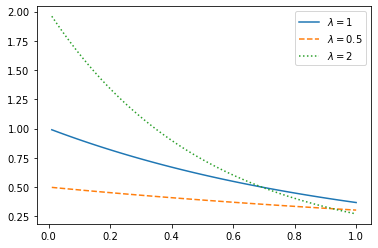

In [29]:
plt.plot(x, expon.pdf(x),
         x, expon.pdf(x, scale=2), '--',
         x, expon.pdf(x, scale=0.5), ':')

plt.legend([r'$\lambda=1$', r'$\lambda=0.5$', r'$\lambda=2$'])

学生t分布的例子：

In [30]:
x = np.linspace(-3, 3)

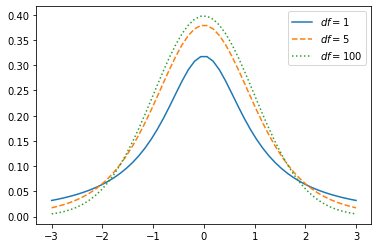

In [31]:
plt.plot(x, t.pdf(x, df=1), 
         x, t.pdf(x, df=5), '--', 
         x, t.pdf(x, df=100), ':')
plt.legend([r'$df=1$', r'$df=5$', r'$df=100$'])

相对于之前的分布，学生t分布有一个额外参数df，表示分布的自由度。额外参数可以分布对象的`.numargs`属性查看。正态分布和指数分布不需要额外参数：

In [32]:
expon.numargs

0

In [33]:
norm.numargs

0

In [34]:
t.numargs

1

额外参数的名称可以用`.shapes`属性查看：

In [35]:
t.shapes

'df'

### 离散分布

离散分布没有概率密度函数，但有概率质量函数（Probability Mass Function，PMF），用来表示每个离散点上的概率，对应于stats模块的`.pmf()`方法。

一个典型的离散分布是离散均匀分布，如一个均匀骰子的掷出的点数：

In [36]:
from scipy.stats import randint

In [37]:
x = np.arange(1, 7)

<StemContainer object of 3 artists>

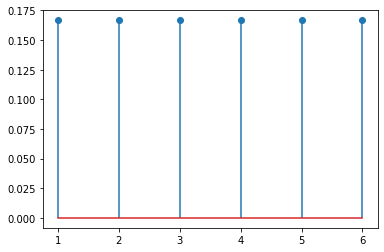

In [38]:
plt.stem(x, randint(1, 7).pmf(x))

`plt.stem()`函数是用来绘制杆状图的函数。

离散均匀分布有两个额外参数：

In [39]:
randint.shapes

'low, high'

另一种常用的离散分布是二项分布：

In [40]:
from scipy.stats import binom

二项分布有额外的参数：

In [41]:
binom.shapes

'n, p'

n是二项分布的试验次数，p是每次试验得到1的概率：

<StemContainer object of 3 artists>

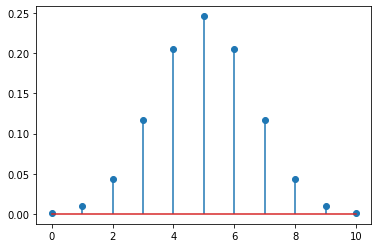

In [42]:
x = np.arange(0, 11)

plt.stem(x, binom(n=10, p=0.5).pmf(x))

泊松分布通常用于描述单位时间内单位时间内随机事件发生的次数：

In [43]:
from scipy.stats import poisson

In [44]:
poisson.shapes

'mu'

其中，mu表示随机事件发生平均发生率：

In [45]:
x = np.arange(21)

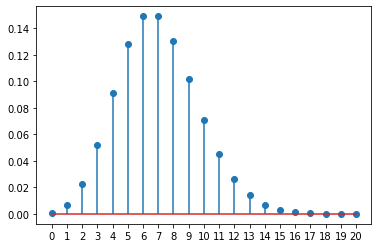

In [46]:
plt.stem(x, poisson(7).pmf(x))
plt.xticks(x)
plt.show()